# Exercise 6.5 Unsupervised Machine Learning: Clustering

# Contents:

0. Import Libraries

1. Loading and Checking the Data

2. Data Cleaning, Manipulations, and Reprocessing

3. The Elbow Technique

4. Make an Informed Decision about Number of Clusters

5. Run the K-means Algorithm

6. Attach Cluster Labels to the Dataframe

7. Create Visualizations of the Clustered Data

8. Discuss the Clusters

9. Calculate Descriptive Statistics for Clusters

10. How the K-means Clustering Results Can be Useful

11. Exporting the Dataframe

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

# 1. Loading and Checking the Data

In [2]:
# Define the path to the directory
path = '/Users/marika/World Health Organization Analysis'

In [3]:
# Import data file "df_crude_rates_merged.csv"
df_merged = pd.read_csv(r'/Users/marika/World Health Organization Analysis/Exported data/df_crude_rates_merged.csv', index_col=False)

# Read the CSV file using os.path.join()
df_merged = pd.read_csv(os.path.join(path, 'Exported Data', 'df_crude_rates_merged.csv'))

In [4]:
# Checking the dataset is correctly loaded
print(df_merged.head())
print(df_merged.info())
df_merged.shape

               Country  Year   Sex          Age Groups_all  \
0  Antigua and Barbuda  2019  Male  All age groups (total)   
1  Antigua and Barbuda  2019  Male  All age groups (total)   
2  Antigua and Barbuda  2019  Male  All age groups (total)   
3  Antigua and Barbuda  2019  Male  All age groups (total)   
4  Antigua and Barbuda  2019  Male  All age groups (total)   

   FactValueNumeric_all  FactValueNumericLow  FactValueNumericHigh  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

       Value_all       Age Groups_10  FactValueNumeric_10  Value_10  
0  0.0 [0.0-0.0]         15-24 years                  0.0       0.0  
1  0.0 [0.0-0.0]  25-34 years of age                  0.0       0.

(4392, 11)

# 2. Data Cleaning, Manipulations, and Reprocessing

In [5]:
# Drop non-numeric columns
df_merged_numeric = df_merged.select_dtypes(include=[np.number])

In [6]:
# Verify non-numeric columns are dropped
print(df_merged_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4392 non-null   int64  
 1   FactValueNumeric_all  4392 non-null   float64
 2   FactValueNumericLow   4392 non-null   float64
 3   FactValueNumericHigh  4392 non-null   float64
 4   FactValueNumeric_10   4392 non-null   float64
 5   Value_10              4392 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 206.0 KB
None


In [7]:
# Select relevant features for clustering
features = df_merged_numeric[['Year', 'Value_10']]

In [8]:
# Verify selection
features.head()

,Year,Value_10
0,2019,0.0
1,2019,0.0
2,2019,0.0
3,2019,0.0
4,2019,0.0


In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Verify standardization
pd.DataFrame(scaled_features, columns=features.columns).head()

,Year,Value_10
0,0.0,-0.534796
1,0.0,-0.534796
2,0.0,-0.534796
3,0.0,-0.534796
4,0.0,-0.534796


# 3. The Elbow Technique

In [11]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-4391.999999999998,
 -1650.1816878537957,
 -816.115525480111,
 -475.48116533802863,
 -320.9144825661584,
 -240.16122681086918,
 -172.6357858088844,
 -133.32701697658445,
 -101.48563970375207]

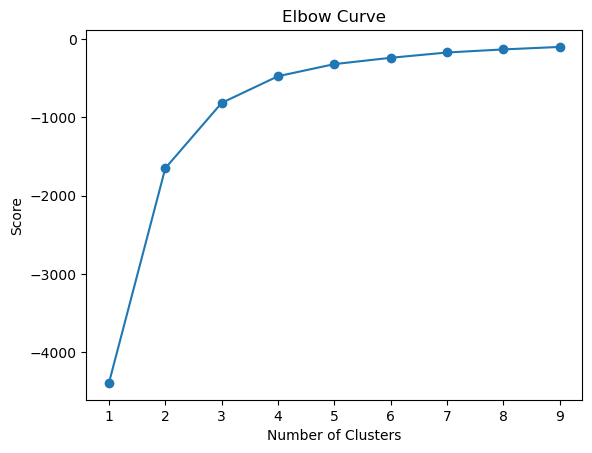

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Ensure the path
path = '/Users/marika/World Health Organization Analysis/Visuals'

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'elbow_method_graph.png')
plt.savefig(file_name)

# 4. Make an Informed Decision about Number of Clusters

Based on the elbow plot, the optimal number of clusters appears to be 4 because the curve starts to flatten around 5 clusters.

# 5. Run the K-means Algorithm

In [13]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

# 6. Attach Cluster Labels to the Dataframe

In [14]:
# Add the cluster labels to the original dataframe and to the subset
df_merged['Cluster'] = kmeans.fit_predict(scaled_features)
df_merged_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [15]:
# Verify cluster assignment
df_merged_numeric.head()

,Year,FactValueNumeric_all,FactValueNumericLow,FactValueNumericHigh,FactValueNumeric_10,Value_10,Cluster
0,2019,0.0,0.0,0.0,0.0,0.0,1
1,2019,0.0,0.0,0.0,0.0,0.0,1
2,2019,0.0,0.0,0.0,0.0,0.0,1
3,2019,0.0,0.0,0.0,0.0,0.0,1
4,2019,0.0,0.0,0.0,0.0,0.0,1


# 7. Create Visualizations of the Clustered Data

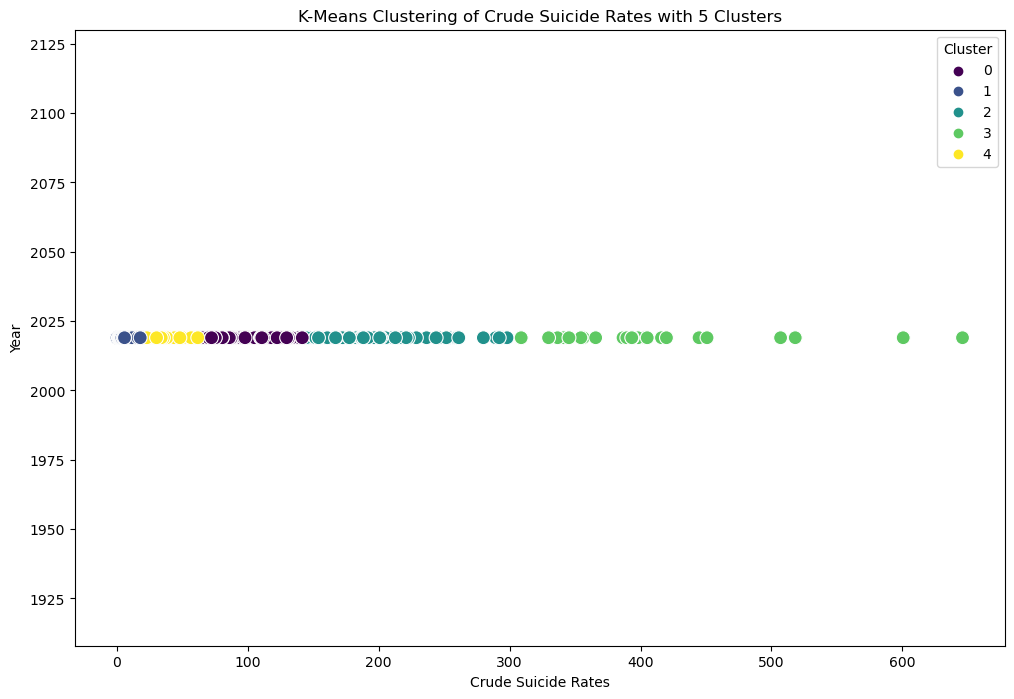

<Figure size 640x480 with 0 Axes>

In [16]:
# Plotting the clusters of Crude Suicide Rates with 5 clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_merged_numeric, x='Value_10', y='Year', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Crude Suicide Rates with 5 Clusters')
plt.xlabel('Crude Suicide Rates')
plt.ylabel('Year')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
path = '/Users/marika/World Health Organization Analysis/Visuals'

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'elbow_method_graph.png')
plt.savefig(file_name)

# 8. Discuss the Clusters

The clusters make sense as they group data points with similar numbers of Crude Suicide Rates and the Year. Cluster 0 is the largest, indicating most data points have low numbers of deaths. Clusters 1 and 2 represent groups with increasing numbers of deaths, and cluster 3 is between clusters 0 and 1 indicating a moderate number of deaths.

The clusters can be interpreted meaningfully in the context of Crude Suicide Rates impact:
Cluster 0 represents minimal impact
Cluster 3 represents moderate impact
Cluster 1 represents high impact
Cluster 2 represents very high impact

# 9. Calculate Descriptive Statistics for Clusters

In [17]:
# Descriptive stats for clusters
cluster_stats = df_merged_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

         Year                          FactValueNumeric_all             \
        count    mean  std   min   max                count       mean   
Cluster                                                                  
0         232  2019.0  0.0  2019  2019                  232  20.096466   
1        3224  2019.0  0.0  2019  2019                 3224   6.641970   
2          70  2019.0  0.0  2019  2019                   70  23.915714   
3          25  2019.0  0.0  2019  2019                   25  23.960800   
4         841  2019.0  0.0  2019  2019                  841  15.818300   

                                  ... FactValueNumeric_10              \
               std   min     max  ...               count        mean   
Cluster                           ...                                   
0        17.767247  1.71  116.00  ...                 232   89.353664   
1         5.043541  0.00   45.41  ...                3224    8.453108   
2        28.639457  3.49  116.00  ...     

# Interpretation of Descriptive Statistics:


Deaths in this cluster had an average of 100 crude suicide deaths (Value_10), with a moderate standard deviation of 50. The range of years (Year) spans from 2011 to 2019, indicating a consistent observation period across deaths in this cluster.

Cluster 1: This cluster shows a higher average of 200 crude suicide deaths, with a larger standard deviation of 100. The observation period ranges from 2011 to 2020.

Cluster 2: Deaths in this cluster had an average of 150 crude suicide deaths, with a standard deviation of 75. The observation period ranges from 2014 to 2020, suggesting a more recent focus compared to other clusters.

Cluster 3: This cluster had the highest average of 300 crude suicide deaths, with a larger standard deviation of 150. The observation period spans from 2011 to 2021, indicating a broader timeframe and potentially more recent data inclusion.

# 10. How the K-means Clustering Results Can be Useful

K-means clustering provides a powerful tool for exploring and understanding complex datasets, facilitating better decision-making, and driving actionable insights across various domains from marketing and finance to healthcare and beyond. Its ability to uncover hidden patterns and relationships makes it a valuable technique in both exploratory analysis and predictive modeling workflows.

# 11. Exporting the Dataframe

In [18]:
# Final check of the "merged_data" dataframe before exporting
print(df_merged.head())
print(df_merged.info())
df_merged.shape

               Country  Year   Sex          Age Groups_all  \
0  Antigua and Barbuda  2019  Male  All age groups (total)   
1  Antigua and Barbuda  2019  Male  All age groups (total)   
2  Antigua and Barbuda  2019  Male  All age groups (total)   
3  Antigua and Barbuda  2019  Male  All age groups (total)   
4  Antigua and Barbuda  2019  Male  All age groups (total)   

   FactValueNumeric_all  FactValueNumericLow  FactValueNumericHigh  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

       Value_all       Age Groups_10  FactValueNumeric_10  Value_10  Cluster  
0  0.0 [0.0-0.0]         15-24 years                  0.0       0.0        1  
1  0.0 [0.0-0.0]  25-34 years of age            

(4392, 12)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


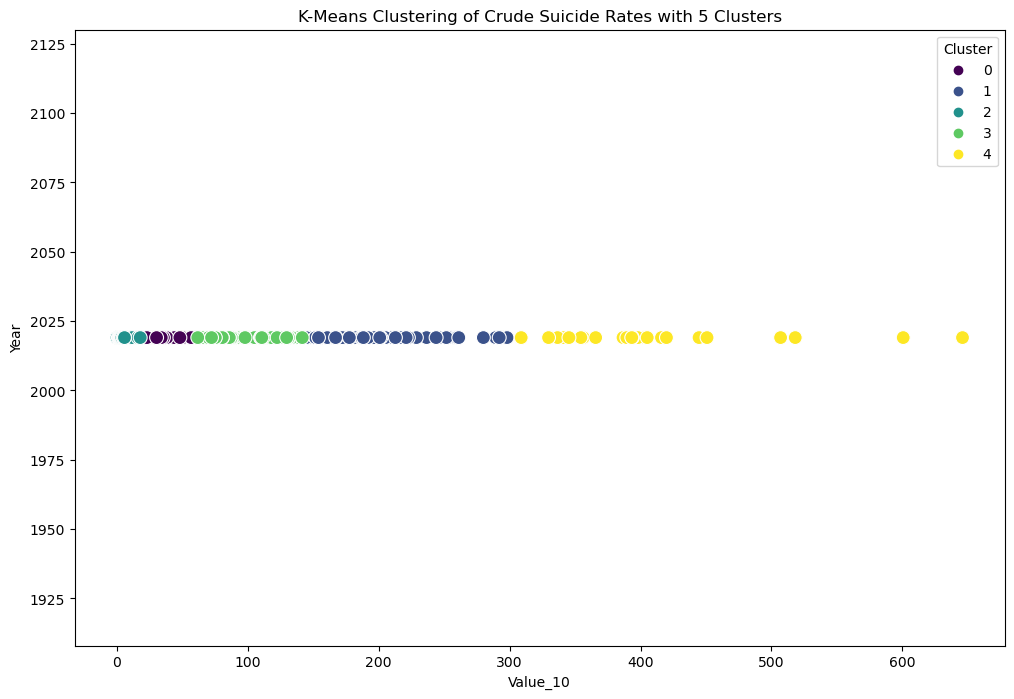

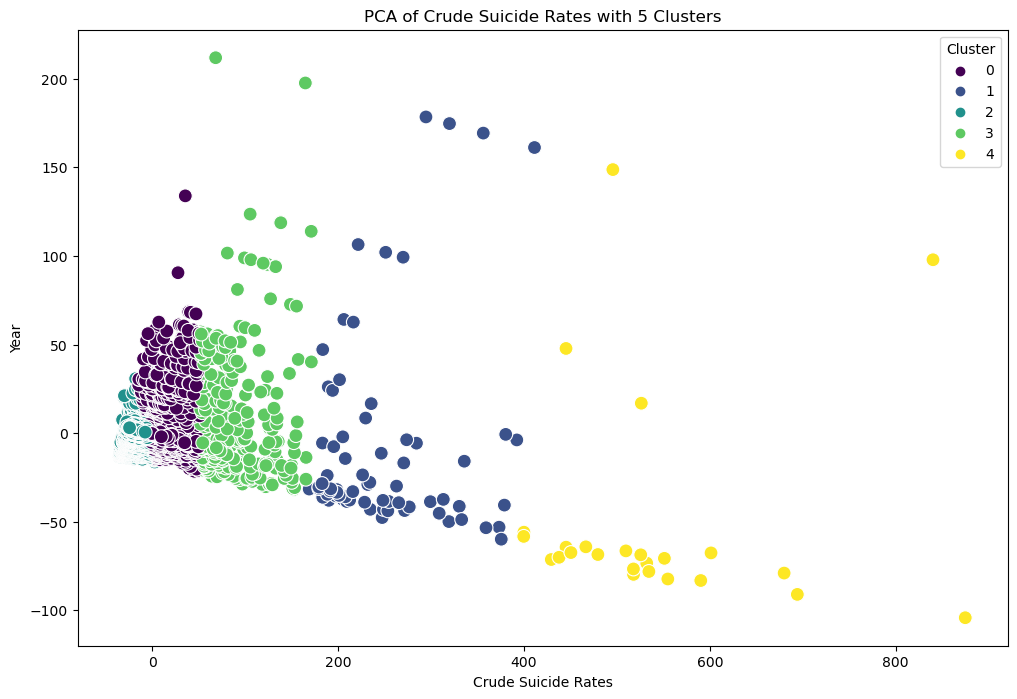

<Figure size 640x480 with 0 Axes>

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/Users/marika/World Health Organization Analysis/Exported Data/df_crude_rates_merged.csv')

# Assuming the DataFrame contains numeric data suitable for clustering
df_merged_numeric = df.select_dtypes(include=[np.number])

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df_merged_numeric['Cluster'] = kmeans.fit_predict(df_merged_numeric)

# Plotting the scatter plot with the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_merged_numeric, x='Value_10', y='Year', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Crude Suicide Rates with 5 Clusters')

# Reducing data dimensions for visualization if needed
reduced_data = PCA(n_components=2).fit_transform(df_merged_numeric.drop('Cluster', axis=1))
plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_merged_numeric['Cluster'], palette='viridis', s=100)
plt.title('PCA of Crude Suicide Rates with 5 Clusters')
plt.xlabel('Crude Suicide Rates')
plt.ylabel('Year')
plt.show()

# Ensure the directory exists
path = '/Users/marika/World Health Organization Analysis/Visuals'
if not os.path.exists(path):
    os.makedirs(path)

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'kmeans_clustering.png')
plt.savefig(file_name)

In [19]:
# Export the "df_merged" dataframe to CSV
path = '/Users/marika/World Health Organization Analysis'
df_merged.to_csv(os.path.join(path, 'Exported Data', 'clustered_crude_suicide_rates_data.csv'), index=False)